In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200) 

In [3]:
df=pd.read_json('book_crawled_data.json')

In [4]:
df.head().T

,0,1,2,3,4
_id,{'$oid': '5f95295e33f37739666330c3'},{'$oid': '5f95295e33f37739666330c8'},{'$oid': '5f95295f33f37739666330d1'},{'$oid': '5f95296033f37739666330da'},{'$oid': '5f95296033f37739666330e2'}
DeliveryMessages,[],[],[],[],[]
AllVariationNameValues,[],[],[],[],[]
CurrentVariationNameValues,[],[],[],[],[]
DataStatus,4,4,4,4,4
...,...,...,...,...,...
OfferMessages,"[5 Gebraucht ab 9,01 €\r\n35 Neu ab 12,99 €]","[4 Gebraucht ab 5,99 €\r\n22 Neu ab 6,95 €]","[5 Gebraucht ab 2,08 €\r\n20 Neu ab 6,95 €]","[8 Gebraucht ab 1,39 €\r\n1 Neu ab 9,80 €]","[3 Gebraucht ab 6,95 €\r\n21 Neu ab 6,95 €]"
OfferCountNew,5,4,5,8,3
OfferCountUsed,0,0,0,0,0
DiscountAmount,{'$numberDecimal': '0'},{'$numberDecimal': '0'},{'$numberDecimal': '0'},{'$numberDecimal': '0'},{'$numberDecimal': '0'}


In [5]:
df2=df[['Asin','Title', 'CategoryPath', 'Price1','PropValues','Comments','Stars']]

In [6]:
df2.head()

,Asin,Title,CategoryPath,Price1,PropValues,Comments,Stars
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,"[Bücher, Literatur & Fiktion, Unterhaltungslit...",{'$numberDecimal': '12.99'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",23,{'$numberDecimal': '3.9'}
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",10,{'$numberDecimal': '4.9'}
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,"[Bücher, Kinderbücher, Kunst, Musik & Fotografie]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",27,{'$numberDecimal': '4.5'}
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,"[Bücher, Ratgeber, Gesundheit & Medizin]",{'$numberDecimal': '9.80'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",93,{'$numberDecimal': '4.3'}
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",18,{'$numberDecimal': '4.7'}


In [7]:
df2.PropValues[0]

[{'PropertyName': 'Authors', 'PropertyValue': 'Horus W. Odenthal'},
 {'PropertyName': 'Format',
  'PropertyValue': '(Deutsch) Broschiert – 4. Oktober 2019'},
 {'PropertyName': 'Title',
  'PropertyValue': 'Warhammer Age of Sigmar - Im Reich der Unbegrabenen: Gotrek'},
 {'PropertyName': 'ISBN-10', 'PropertyValue': '1781934606'},
 {'PropertyName': 'ISBN-13', 'PropertyValue': '978-1781934609'},
 {'PropertyName': 'Broschiert', 'PropertyValue': '448 Seiten'},
 {'PropertyName': 'Größe und/oder Gewicht',
  'PropertyValue': '14.8 x 2.5 x 21 cm'},
 {'PropertyName': 'Herausgeber',
  'PropertyValue': 'Black Library; 1. Auflage (4. Oktober 2019)'},
 {'PropertyName': 'Sprache:', 'PropertyValue': 'Deutsch'},
 {'PropertyName': 'Amazon Bestseller-Rang', 'PropertyValue': ''}]

In [7]:
df2['Book_Price']=0

In [8]:
df2.head()

,Asin,Title,CategoryPath,Price1,PropValues,Comments,Stars,Book_Price
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,"[Bücher, Literatur & Fiktion, Unterhaltungslit...",{'$numberDecimal': '12.99'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",23,{'$numberDecimal': '3.9'},0
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",10,{'$numberDecimal': '4.9'},0
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,"[Bücher, Kinderbücher, Kunst, Musik & Fotografie]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",27,{'$numberDecimal': '4.5'},0
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,"[Bücher, Ratgeber, Gesundheit & Medizin]",{'$numberDecimal': '9.80'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",93,{'$numberDecimal': '4.3'},0
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",18,{'$numberDecimal': '4.7'},0


In [9]:
for i,d in enumerate(df2.Price1):
    df2['Book_Price'][i]=list(df2.Price1[i].values())[0]

In [10]:
df2.Book_Price=df2.Book_Price.astype('float')

In [11]:
df2['Book_Star']=0

In [12]:
for i,d in enumerate(df2.Stars):
    df2['Book_Star'][i]=list(df2.Stars[i].values())[0]

In [13]:
df2.Book_Star=df2.Book_Star.astype('float')

In [14]:
df2.head()

,Asin,Title,CategoryPath,Price1,PropValues,Comments,Stars,Book_Price,Book_Star
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,"[Bücher, Literatur & Fiktion, Unterhaltungslit...",{'$numberDecimal': '12.99'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",23,{'$numberDecimal': '3.9'},12.99,3.9
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",10,{'$numberDecimal': '4.9'},6.95,4.9
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,"[Bücher, Kinderbücher, Kunst, Musik & Fotografie]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",27,{'$numberDecimal': '4.5'},6.95,4.5
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,"[Bücher, Ratgeber, Gesundheit & Medizin]",{'$numberDecimal': '9.80'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",93,{'$numberDecimal': '4.3'},9.80,4.3
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",18,{'$numberDecimal': '4.7'},6.95,4.7


In [15]:
df2['Category']='Buch'

In [16]:
for i,a in enumerate(df2.CategoryPath):
    if len(a)==2:
        df2['Category'][i]=a[1]
    if len(a)==3:
        df2['Category'][i]=a[2]
    else:
        df2['Category'][i]='Bücher'

In [17]:
df2.head()

,Asin,Title,CategoryPath,Price1,PropValues,Comments,Stars,Book_Price,Book_Star,Category
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,"[Bücher, Literatur & Fiktion, Unterhaltungslit...",{'$numberDecimal': '12.99'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",23,{'$numberDecimal': '3.9'},12.99,3.9,Unterhaltungsliteratur
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",10,{'$numberDecimal': '4.9'},6.95,4.9,Spiel & Spaß
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,"[Bücher, Kinderbücher, Kunst, Musik & Fotografie]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",27,{'$numberDecimal': '4.5'},6.95,4.5,"Kunst, Musik & Fotografie"
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,"[Bücher, Ratgeber, Gesundheit & Medizin]",{'$numberDecimal': '9.80'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",93,{'$numberDecimal': '4.3'},9.80,4.3,Gesundheit & Medizin
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,"[Bücher, Kinderbücher, Spiel & Spaß]",{'$numberDecimal': '6.95'},"[{'PropertyName': 'Authors', 'PropertyValue': ...",18,{'$numberDecimal': '4.7'},6.95,4.7,Spiel & Spaß


In [18]:
df2=df2.drop(['CategoryPath','Price1','Stars'], axis=1)

In [19]:
df2.head()

,Asin,Title,PropValues,Comments,Book_Price,Book_Star,Category
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,"[{'PropertyName': 'Authors', 'PropertyValue': ...",23,12.99,3.9,Unterhaltungsliteratur
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,"[{'PropertyName': 'Authors', 'PropertyValue': ...",10,6.95,4.9,Spiel & Spaß
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,"[{'PropertyName': 'Authors', 'PropertyValue': ...",27,6.95,4.5,"Kunst, Musik & Fotografie"
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,"[{'PropertyName': 'Authors', 'PropertyValue': ...",93,9.80,4.3,Gesundheit & Medizin
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,"[{'PropertyName': 'Authors', 'PropertyValue': ...",18,6.95,4.7,Spiel & Spaß


In [20]:
df2.to_csv('books.csv')

In [21]:
df4=pd.read_csv('books.csv')

In [22]:
df4

,Unnamed: 0,Asin,Title,PropValues,Comments,Book_Price,Book_Star,Category
0,0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,"[{'PropertyName': 'Authors', 'PropertyValue': ...",23,12.99,3.9,Unterhaltungsliteratur
1,1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,"[{'PropertyName': 'Authors', 'PropertyValue': ...",10,6.95,4.9,Spiel & Spaß
2,2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,"[{'PropertyName': 'Authors', 'PropertyValue': ...",27,6.95,4.5,"Kunst, Musik & Fotografie"
3,3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,"[{'PropertyName': 'Authors', 'PropertyValue': ...",93,9.80,4.3,Gesundheit & Medizin
4,4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,"[{'PropertyName': 'Authors', 'PropertyValue': ...",18,6.95,4.7,Spiel & Spaß
...,...,...,...,...,...,...,...,...
83052,83052,3442743389,Shalimar der Narr: Roman,"[{'PropertyName': 'Authors', 'PropertyValue': ...",13,11.99,4.1,Weltliteratur
83053,83053,3446247343,'45: Die Welt am Wendepunkt,"[{'PropertyName': 'Authors', 'PropertyValue': ...",4,26.00,4.6,Geschichte nach Ländern
83054,83054,3841421253,Die Poison Diaries: Band 2,"[{'PropertyName': 'Authors', 'PropertyValue': ...",20,14.99,3.7,Weltliteratur
83055,83055,3841421350,Als gäbe es einen Himmel,"[{'PropertyName': 'Authors', 'PropertyValue': ...",8,19.95,4.3,Unterhaltungsliteratur


In [23]:
df4=df4.drop('Unnamed: 0', axis=1)

In [24]:
df4['Prop_values']=df2['PropValues']

In [25]:
df4.drop('PropValues',axis=1,inplace=True)

In [26]:
df4.head()

,Asin,Title,Comments,Book_Price,Book_Star,Category,Prop_values
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,23,12.99,3.9,Unterhaltungsliteratur,"[{'PropertyName': 'Authors', 'PropertyValue': ..."
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,10,6.95,4.9,Spiel & Spaß,"[{'PropertyName': 'Authors', 'PropertyValue': ..."
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,27,6.95,4.5,"Kunst, Musik & Fotografie","[{'PropertyName': 'Authors', 'PropertyValue': ..."
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,93,9.80,4.3,Gesundheit & Medizin,"[{'PropertyName': 'Authors', 'PropertyValue': ..."
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,18,6.95,4.7,Spiel & Spaß,"[{'PropertyName': 'Authors', 'PropertyValue': ..."


### Filling the missing values into the features

In [310]:
df4.isnull().sum()/df4.shape[0]*100

Asin                0.0
Title               0.0
Comments            0.0
Book_Price          0.0
Book_Star           0.0
Category            0.0
Author              0.0
Publication_year    0.0
Publisher           0.0
num_Page            0.0
dtype: float64

In [311]:
df4.drop(df4.Author[(df4.Author.isnull())&(df4.Publisher.isnull())].index,inplace=True)

In [312]:
for i in df4[df4.Author.isnull()].index:
    df4.Author[i]=df4.Publisher[i]

In [313]:
for i in book_recom[book_recom.Author=='unbekannt'].index:
    book_recom.Author[i]=book_recom.Publisher[i]

In [314]:
for i in book_recom[book_recom.Author=='Author'].index:
    book_recom.Author[i]=book_recom.Publisher[i]

In [315]:
for i in book_recom[book_recom.Author=='Klett '].index:
    book_recom.Author[i]=book_recom.Publisher[28]

In [316]:
for i in book_recom[book_recom.Publisher.str.contains('Klett')].Publisher.index:
    book_recom.Publisher[i]=book_recom.Publisher[28]

In [317]:
for i in book_recom[book_recom.Publisher.str.contains('PONS')].Publisher.index:
    book_recom.Publisher[i]='PONS GmbH'

In [318]:
for i in book_recom[book_recom.Author.str.contains('PONS')].index:
    book_recom.Author[i]="PONS GmbH"

In [358]:
for i in book_recom[book_recom.Author=="-"].index:
    book_recom.Author[i]=book_recom.Publisher[i]

In [319]:
book_recom.drop([71646,75191],axis=0,inplace=True)

In [320]:
book_recom.drop(book_recom[book_recom.Book_Price==0].index,axis=0,inplace=True)

In [321]:
book_recom.drop(book_recom[book_recom.Book_Star==0].index,axis=0,inplace=True)


In [42]:
df4.drop(df4[(df4.Publication_year.isnull())&(df4.Publisher.isnull())].index,inplace=True)

In [43]:
df4.drop(df4[df4.num_Page.isnull()].index,inplace=True)

In [44]:
df4.drop(['Prop_values'],axis=1,inplace=True)

In [45]:
df4.drop(df4[df4.num_Page.str.contains('e')].index,inplace=True)

### Change of Type of Columns

In [46]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78486 entries, 0 to 83056
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Asin              78486 non-null  object 
 1   Title             78486 non-null  object 
 2   Comments          78486 non-null  int64  
 3   Book_Price        78486 non-null  float64
 4   Book_Star         78486 non-null  float64
 5   Category          78486 non-null  object 
 6   Author            78486 non-null  object 
 7   Publication_year  78486 non-null  object 
 8   Publisher         78486 non-null  object 
 9   num_Page          78486 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.6+ MB


In [47]:
(df4.astype({'Publication_year': 'int64','num_Page': 'int64'}).dtypes)

Asin                 object
Title                object
Comments              int64
Book_Price          float64
Book_Star           float64
Category             object
Author               object
Publication_year      int64
Publisher            object
num_Page              int64
dtype: object

## Feature Engineering

#### 1. Author Column

In [29]:
Author=[]

In [30]:
for j in range(0,df4.shape[0]):
       for i in range(0,len(df4.Prop_values[j])):
            if df4.Prop_values[j][i].get('PropertyName')=="Authors":
                Author.append(df4.Prop_values[j][i].get('PropertyValue'))
                break
            elif i == len(df4.Prop_values[j])-1:
                Author.append(np.nan)
df4['Author']=Author                         

#### 2. YoP Column

In [31]:
df4["Publication_year"]=np.nan

In [32]:
a=[]

In [33]:
for j in range(0,df4.shape[0]):
    for i in range(0,len(df4.Prop_values[j])):
        if df4.Prop_values[j][i].get('PropertyName')=="Herausgeber":
            a.append(df4.Prop_values[j][i].get('PropertyValue')[-5:-1])
            break
        elif i == len(df4.Prop_values[j])-1:
            a.append(np.nan)
            
            
df4["Publication_year"]=a

#### 3. Publisher Column

In [34]:
b=[]

In [35]:
for j in range(0,df4.shape[0]):
    for i in range(0,len(df4.Prop_values[j])):
        if df4.Prop_values[j][i].get('PropertyName')=="Herausgeber":
            b.append(df4.Prop_values[j][i].get('PropertyValue').split(';')[0])
            break
        elif i == len(df4.Prop_values[j])-1:
            b.append(np.nan)
df4['Publisher']=b          

In [36]:
for i in df4['Publisher'][df4['Publisher'].str.contains(pat="(",regex=False)==True].index:
    df4.Publisher[i]=df4.Publisher[i].split('(')[0]

#### 4. Num of Page Column

In [37]:
c=[]

In [38]:
for j in range(0,df4.shape[0]):
    for i in range(0,len(df4.Prop_values[j])):
        if 'Seite' in df4.Prop_values[j][i].get('PropertyValue'):
            c.append(df4.Prop_values[j][i].get('PropertyValue')[:-7])
            break
        elif i == len(df4.Prop_values[j])-1:
            c.append(np.nan)
df4['num_Page']=c

#### 5. Total Rating Score

In [48]:
df4.to_csv('Books_Recommendation.csv')

In [308]:
book_recom=pd.read_csv('Books_Recommendation.csv',dtype={'Publication_year': 'int64','num_Page': 'int64'},index_col=0)

In [113]:
book_recom['Total_Rating_Score']= book_recom['Comments']*book_recom['Book_Star']

In [114]:
book_recom.reset_index(inplace=True)

In [360]:
book_recom.to_csv('Books_Recommendation.csv')

In [365]:
book_recom.head()

,Asin,Title,Comments,Book_Price,Book_Star,Category,Author,Publication_year,Publisher,num_Page,Total_Rating_Score
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,23,12.99,3.9,Unterhaltungsliteratur,Horus W. Odenthal,2019,Black Library,448,89.7
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,10,6.95,4.9,Spiel & Spaß,"Fiona Watt,Paul Nicholls",2017,Usborne Publishing,34,49.0
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,27,6.95,4.5,"Kunst, Musik & Fotografie","Hannah Watson,Marina Aizen",2017,Usborne Publishing,24,121.5
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,93,9.80,4.3,Gesundheit & Medizin,Simon Kraft,2014,CreateSpace Independent Publishing Platform,136,399.9
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,18,6.95,4.7,Spiel & Spaß,Stella Baggott,2015,Usborne Publishing,34,84.6


### EDA

In [15]:
df5=pd.read_csv('Books_Recommendation.csv')

In [16]:
df5.head()

,Unnamed: 0,Asin,Title,Comments,Book_Price,Book_Star,Category,Author,Publication_year,Publisher,num_Page,Total_Rating_Score
0,0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,23,12.99,3.9,Unterhaltungsliteratur,Horus W. Odenthal,2019,Black Library,448,89.7
1,1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,10,6.95,4.9,Spiel & Spaß,"Fiona Watt,Paul Nicholls",2017,Usborne Publishing,34,49.0
2,2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,27,6.95,4.5,"Kunst, Musik & Fotografie","Hannah Watson,Marina Aizen",2017,Usborne Publishing,24,121.5
3,3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,93,9.80,4.3,Gesundheit & Medizin,Simon Kraft,2014,CreateSpace Independent Publishing Platform,136,399.9
4,4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,18,6.95,4.7,Spiel & Spaß,Stella Baggott,2015,Usborne Publishing,34,84.6


In [17]:
df5.drop('Unnamed: 0',1, inplace=True)

In [18]:
df5.head(10)

,Asin,Title,Comments,Book_Price,Book_Star,Category,Author,Publication_year,Publisher,num_Page,Total_Rating_Score
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,23,12.99,3.9,Unterhaltungsliteratur,Horus W. Odenthal,2019,Black Library,448,89.7
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,10,6.95,4.9,Spiel & Spaß,"Fiona Watt,Paul Nicholls",2017,Usborne Publishing,34,49.0
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,27,6.95,4.5,"Kunst, Musik & Fotografie","Hannah Watson,Marina Aizen",2017,Usborne Publishing,24,121.5
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,93,9.80,4.3,Gesundheit & Medizin,Simon Kraft,2014,CreateSpace Independent Publishing Platform,136,399.9
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,18,6.95,4.7,Spiel & Spaß,Stella Baggott,2015,Usborne Publishing,34,84.6
5,178232545X,Ich weiß jetzt 100 Dinge mehr! Abenteuer Natur...,22,12.95,4.8,Wissenschaft & Natur,"Alex Frith,Minna Lacey,Jerome Martin,Jonathan ...",2017,Usborne Publishing,128,105.6
6,1781934282,Die Verlorenen und die Verdammten: The Horus H...,82,15.00,4.8,Fantasy,Guy Haley,2019,Black Library,395,393.6
7,1782321675,Warum schlägt mein Herz?: 60 schlaue Fragen üb...,40,12.95,4.4,Wissenschaft & Natur,"Katie Daynes,Marie-Eve Tremblay",2014,Usborne Publishing,14,176.0
8,1781933669,Warhammer 40.000 - Mephiston: Kreuzug der Verd...,8,12.99,4.1,Fantasy,Ralph Hummel,2019,Black Library,347,32.8
9,1781932948,Warhammer 40.000 - Hereticus: Eisenhorn,17,12.99,4.5,Fantasy,"Dan Abnett,Stefan Behrenbruch",2018,Black Library,400,76.5


In [19]:
df5_category=df5.groupby('Category')['Title'].count()

In [20]:
df5_category2=df5_category.reset_index()

In [21]:
df5_category3=df5_category2.sort_values('Title',ascending=False)

In [22]:
df5_category3.drop(index=df5_category3[df5_category3.Category=='Bücher'].index, inplace=True)

In [23]:
df5_category4=df5_category3.head(20)

In [24]:
df5_category4

,Category,Title
300,Weltliteratur,5666
111,Gesundheit & Medizin,3038
287,Unterhaltungsliteratur,2643
158,Krimis,2431
25,Belletristik,2366
99,Gegenwartsliteratur,2191
90,Fremdsprachen & Sprachkurse,1992
230,Psychologie & Hilfe,1942
304,Wissen nach Themen,1650
254,Schulbücher,1478


In [26]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 20 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 15 }

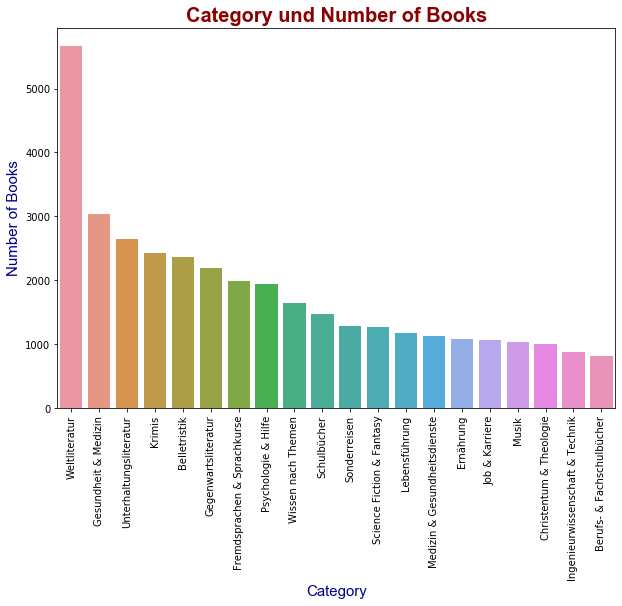

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Category', y='Title', data =df5_category4)
plt.title('Category und Number of Books',title_font)
plt.xlabel('Category',axis_style)
plt.ylabel('Number of Books',axis_style)
plt.xticks(rotation = 90)
plt.show()

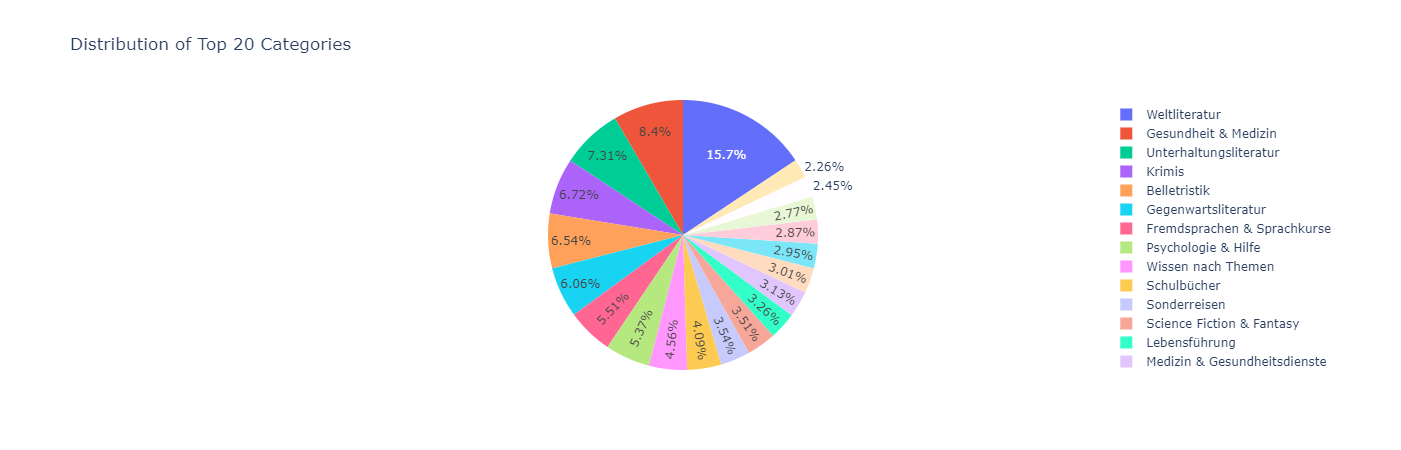

In [54]:
fig=px.pie(df5_category4, values='Title',title='Distribution of Top 20 Categories', names='Category')
fig.show()

In [56]:
df5.head()

,Asin,Title,Comments,Book_Price,Book_Star,Category,Author,Publication_year,Publisher,num_Page,Total_Rating_Score
0,1781934606,Warhammer Age of Sigmar - Im Reich der Unbegra...,23,12.99,3.9,Unterhaltungsliteratur,Horus W. Odenthal,2019,Black Library,448,89.7
1,1782325956,Mein Stickerbuch: Abenteuer Raumfahrt,10,6.95,4.9,Spiel & Spaß,"Fiona Watt,Paul Nicholls",2017,Usborne Publishing,34,49.0
2,178232707X,Mein Wisch-und-weg-Buch Schulstart: Ich schrei...,27,6.95,4.5,"Kunst, Musik & Fotografie","Hannah Watson,Marina Aizen",2017,Usborne Publishing,24,121.5
3,1495335216,Praxishandbuch Healing Code: Weiterentwicklung...,93,9.80,4.3,Gesundheit & Medizin,Simon Kraft,2014,CreateSpace Independent Publishing Platform,136,399.9
4,178232321X,Mein Mode-Stickerbuch: Hochzeitskollektion,18,6.95,4.7,Spiel & Spaß,Stella Baggott,2015,Usborne Publishing,34,84.6


In [74]:
df5_book_star2=df5.groupby('Category')['Book_Star'].mean().reset_index().sort_values('Book_Star',ascending=False).head(20)

In [75]:
df5_book_star2

,Category,Book_Star
227,Postkarten & Poster,5.000000
128,Hinduismus,5.000000
56,Deutsch als Fremdsprache (DAF),5.000000
204,Mädchen (0 -24 Monate),5.000000
294,Wand- & Türschilder,5.000000
291,Verschiedenes,5.000000
310,Zivilrecht,5.000000
185,Länder & Städte,4.933333
165,Köche & Kochshows im Fernsehen,4.900000
238,Rechtsmedizin,4.900000


In [58]:
df5_book_star=df5.groupby('Category')[['Total_Rating_Score','Comments','Book_Star']].mean().reset_index()

In [59]:
df5_book_star.sort_values('Book_Star',ascending=False).head(20)
# book star kiyaslamak icin mantikli bir sonuc vermiyor

,Category,Total_Rating_Score,Comments,Book_Star
227,Postkarten & Poster,5.000000,1.000000,5.000000
128,Hinduismus,15.000000,3.000000,5.000000
56,Deutsch als Fremdsprache (DAF),20.000000,4.000000,5.000000
204,Mädchen (0 -24 Monate),30.000000,6.000000,5.000000
294,Wand- & Türschilder,10.000000,2.000000,5.000000
291,Verschiedenes,5.000000,1.000000,5.000000
310,Zivilrecht,15.000000,3.000000,5.000000
185,Länder & Städte,75.233333,15.333333,4.933333
165,Köche & Kochshows im Fernsehen,49.000000,10.000000,4.900000
238,Rechtsmedizin,112.700000,23.000000,4.900000


In [60]:
df5_book_star.sort_values('Total_Rating_Score',ascending=False).head(20)

,Category,Total_Rating_Score,Comments,Book_Star
289,Vegetarische & vegane Küche,46023.000000,10005.000000,4.600000
240,Rechtsstreit,1478.070000,314.800000,4.260000
249,Romantische Thriller,1194.028571,261.571429,4.371429
296,Wandkalender,723.800000,154.000000,4.700000
279,Thriller & Suspense,505.179969,116.061633,4.137750
88,Frauenliteratur,483.106731,109.985577,4.305769
144,Kindergarten,475.200000,108.000000,4.400000
60,Dramatik,452.833929,102.776786,4.332143
242,Reise-Zubehör,421.400000,98.000000,4.300000
1,Action & Abenteuer,405.965306,93.108844,4.206122


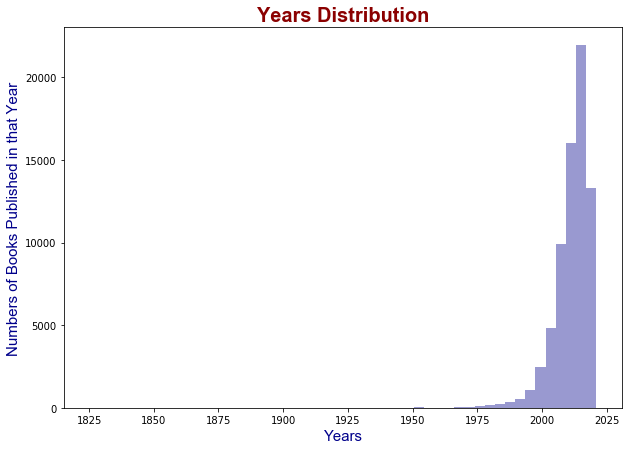

In [79]:
plt.figure(figsize=(10,7))
sns.distplot(df5.Publication_year, kde=False, color = 'darkblue', bins=50)
plt.title('Years Distribution',title_font)
plt.ylabel('Numbers of Books Published in that Year',axis_style)
plt.xlabel('Years',axis_style)
plt.show()

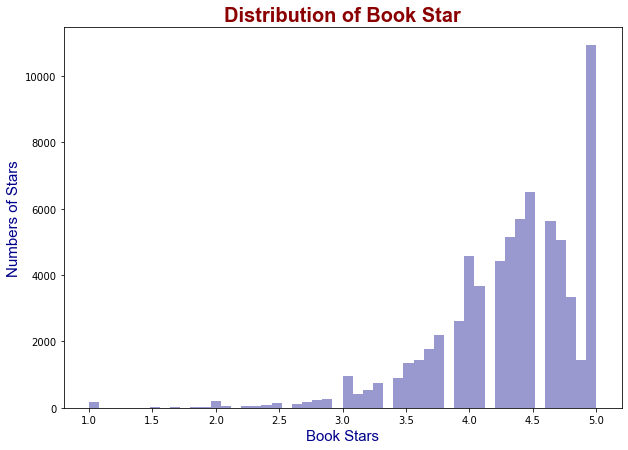

In [61]:
plt.figure(figsize=(10,7))
sns.distplot(df5.Book_Star, kde=False, color = 'darkblue')
plt.title('Distribution of Book Star',title_font)
plt.ylabel('Numbers of Stars',axis_style)
plt.xlabel('Book Stars',axis_style)
plt.show()

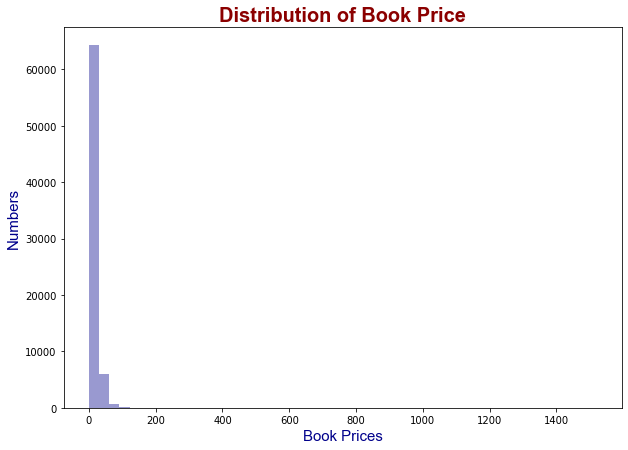

In [67]:
plt.figure(figsize=(10,7))
sns.distplot(df5.Book_Price, kde=False, color = 'darkblue',bins=50)
plt.title('Distribution of Book Price',title_font)
plt.ylabel('Numbers',axis_style)
plt.xlabel('Book Prices',axis_style)
plt.show()

In [68]:
df5[df5.Book_Price>200].Title.count()

18

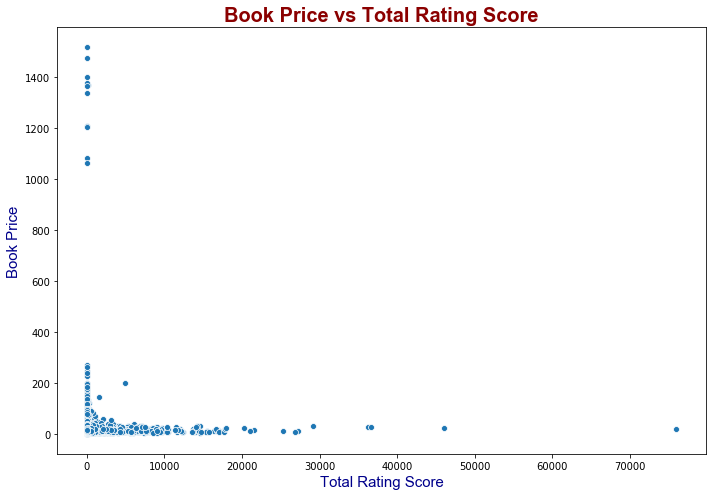

In [69]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df5,x='Total_Rating_Score',y='Book_Price')
plt.title('Book Price vs Total Rating Score',title_font)
plt.xlabel('Total Rating Score',axis_style)
plt.ylabel('Book Price',axis_style)
plt.tight_layout()
plt.show()

In [70]:
# en cok 20 yazar
df5.groupby('Author')['Title'].count().reset_index().sort_values('Title',ascending=False).head(10)

,Author,Title
25054,Klett,453
37461,Schroedel Verlag GmbH,129
43562,Westermann Schulbuch,107
10340,Dorling Kindersley Reiseführer,87
32448,PONS GmbH,85
38431,Stark Verlag,79
23515,Karl May,71
14231,Gabriele Haefs,69
10699,Dr. Oetker,64
34946,Redaktion Langenscheidt,63


In [71]:
# en cok yorum alan 10 yazar
df5_author=df5.groupby('Author')['Comments'].sum().reset_index().sort_values('Comments',ascending=False).head(10)
df5_author

,Author,Comments
1241,"Andrea Brandl,Sonja Hauser",31773
37519,Sebastian Fitzek,20739
26700,M.L. Stedman,16877
43569,Wibke Kuhn,14691
6475,Charlotte Link,14173
23675,Karolina Fell,10447
24336,Kerstin Gier,10309
16161,Hannes Thiess,10259
20627,Jeff Kinney,10214
16894,Hape Kerkeling,10053


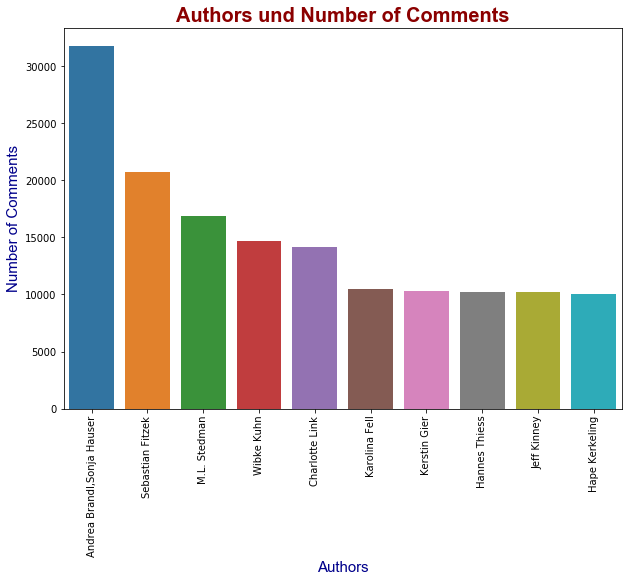

In [102]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Author', y='Comments', data =df5_author)
plt.title('Authors und Number of Comments',title_font)
plt.xlabel('Authors',axis_style)
plt.ylabel('Number of Comments',axis_style)
plt.xticks(rotation = 90)
plt.show()